In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Numerical Data**

In [3]:
df = pd.read_csv("/content/train.csv" , usecols = ["Age","Fare","Survived"])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [4]:
df.isnull().mean() * 100

,0
Survived,0.00000
Age,19.86532
Fare,0.00000


In [5]:
X = df.drop("Survived" , axis = 1)
y = df["Survived"]

In [6]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X,y,
                                                       test_size = 0.2,
                                                       random_state = 0)

In [7]:
X_train["Age_imputed"] = X_train["Age"]
X_test["Age_imputed"] = X_test["Age"]

In [8]:
X_train["Age_imputed"][X_train["Age"].isnull()] = X_train["Age"].dropna().sample(X_train["Age"].isnull().sum()).values
X_test["Age_imputed"][X_test["Age"].isnull()] = X_test["Age"].dropna().sample(X_test["Age"].isnull().sum()).values

<ipython-input-8-dff7ffa35ef0>:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  X_train["Age_imputed"][X_train["Age"].isnull()] = X_train["Age"].dropna().sample(X_train["Age"].isnull().sum()).values
<ipython-input-8-dff7ffa35ef0>:2: FutureWa

In [9]:
X_train.head()

,Age,Fare,Age_imputed
140,NaN,15.2458,41.0
439,31.0,10.5000,31.0
817,31.0,37.0042,31.0
378,20.0,4.0125,20.0
491,21.0,7.2500,21.0


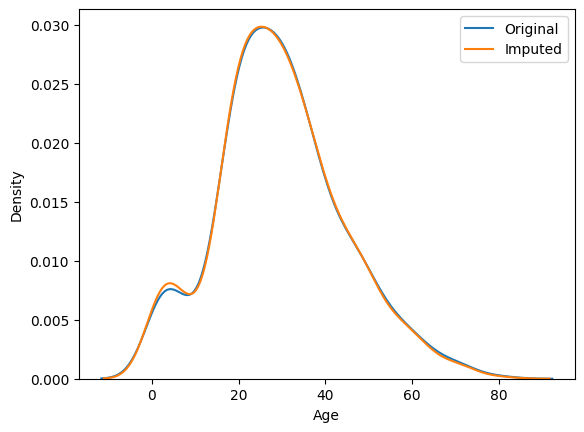

In [10]:
sns.kdeplot(X_train["Age"] , label = "Original")
sns.kdeplot(X_train["Age_imputed"] , label = "Imputed")
plt.legend()
plt.show()

In [11]:
print("Orignal Variable Variance: ",X_train["Age"].var())
print("Imputed Variable Variance: ",X_train["Age_imputed"].var())

Orignal Variable Variance:  213.7165085187578
Imputed Variable Variance:  211.97530121505574


In [12]:
X_train[["Fare","Age","Age_imputed"]].cov()

,Fare,Age,Age_imputed
Fare,2513.549265,79.072379,64.134173
Age,79.072379,213.716509,213.716509
Age_imputed,64.134173,213.716509,211.975301


<Axes: >

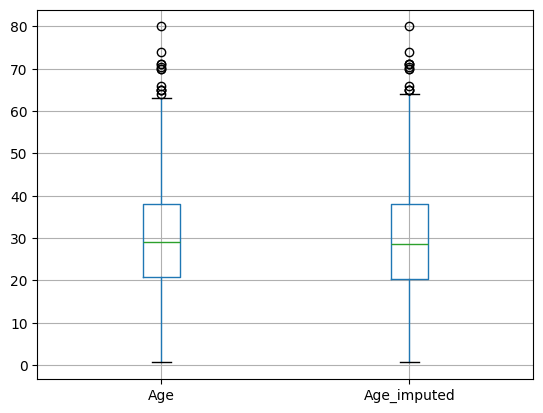

In [13]:
X_train[["Age","Age_imputed"]].boxplot()

# **Categorical Data**

In [15]:
data = pd.read_csv("train (1).csv" , usecols = ["GarageQual" , "FireplaceQu","SalePrice"])
data.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [18]:
data.isnull().mean() *100

,0
FireplaceQu,47.260274
GarageQual,5.547945
SalePrice,0.000000


In [17]:
X = data.drop("SalePrice" , axis = 1)
y = data["SalePrice"]

In [19]:
X_train , X_test , y_tain , y_test = train_test_split(X,y,
                                                      test_size = 0.2,
                                                      random_state = 0)

In [20]:
X_train["GarageQual_imputed"] = X_train["GarageQual"]
X_test["GarageQual_imputed"] = X_test["GarageQual"]

X_train["FireplaceQu_imputed"] = X_train["FireplaceQu"]
X_test["FireplaceQu_imputed"] = X_test["FireplaceQu"]


In [21]:
X_train.sample(5)

,FireplaceQu,GarageQual,GarageQual_imputed,FireplaceQu_imputed
1269,NaN,TA,TA,NaN
1197,Gd,TA,TA,Gd
1116,TA,TA,TA,TA
531,NaN,TA,TA,NaN
639,Gd,TA,TA,Gd


In [22]:
X_train["GarageQual_imputed"][X_train["GarageQual_imputed"].isnull()] = X_train["GarageQual"].dropna().sample(X_train["GarageQual_imputed"].isnull().sum()).values
X_test["GarageQual_imputed"][X_test["GarageQual_imputed"].isnull()] = X_test["GarageQual"].dropna().sample(X_test["GarageQual_imputed"].isnull().sum()).values

X_train["FireplaceQu_imputed"][X_train["FireplaceQu_imputed"].isnull()] = X_train["FireplaceQu"].dropna().sample(X_train["FireplaceQu_imputed"].isnull().sum()).values
X_test["FireplaceQu_imputed"][X_test["FireplaceQu_imputed"].isnull()] = X_test["FireplaceQu"].dropna().sample(X_test["FireplaceQu_imputed"].isnull().sum()).values

<ipython-input-22-4680ef340df4>:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  X_train["GarageQual_imputed"][X_train["GarageQual_imputed"].isnull()] = X_train["GarageQual"].dropna().sample(X_train["GarageQual_imputed"].isnull().sum()).valu

In [26]:
X_train.sample(15)

,FireplaceQu,GarageQual,GarageQual_imputed,FireplaceQu_imputed
1252,NaN,TA,TA,TA
1024,Gd,TA,TA,Gd
1319,NaN,TA,TA,Gd
818,NaN,TA,TA,Gd
944,Gd,TA,TA,Gd
819,Gd,TA,TA,Gd
1205,TA,TA,TA,TA
228,Fa,TA,TA,Fa
1245,TA,TA,TA,TA
283,Gd,TA,TA,Gd


In [34]:
temp = pd.concat([
    X_train["GarageQual"].value_counts() / len(X_train["GarageQual"].dropna()) ,
    X_train["GarageQual_imputed"].value_counts() / len(X_train)
] , axis = 1)
temp.columns = ["Original" , "Imputed"]

In [35]:
temp

,Original,Imputed
TA,0.950450,0.952055
Fa,0.036036,0.035103
Gd,0.009009,0.008562
Po,0.002703,0.002568
Ex,0.001802,0.001712


In [36]:
temp = pd.concat([
    X_train["FireplaceQu"].value_counts() / len(X_train["FireplaceQu"].dropna()) ,
    X_train["FireplaceQu_imputed"].value_counts() / len(X_train)
] , axis = 1)

temp.columns = ["Original" , "Imputed"]

In [37]:
temp

,Original,Imputed
Gd,0.478120,0.476884
TA,0.416532,0.418664
Fa,0.047002,0.044521
Ex,0.030794,0.031678
Po,0.027553,0.028253


In [42]:
data.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [43]:
data["GarageQual_imputed"] = data["GarageQual"]
data["FireplaceQu_imputed"] = data["FireplaceQu"]

In [44]:
data.head()

,FireplaceQu,GarageQual,SalePrice,GarageQual_imputed,FireplaceQu_imputed
0,NaN,TA,208500,TA,NaN
1,TA,TA,181500,TA,TA
2,TA,TA,223500,TA,TA
3,Gd,TA,140000,TA,Gd
4,TA,TA,250000,TA,TA


In [48]:
data["GarageQual_imputed"][data["GarageQual_imputed"].isnull()] = data["GarageQual"].dropna().sample(data["GarageQual_imputed"].isnull().sum()).values
data["FireplaceQu_imputed"][data["FireplaceQu_imputed"].isnull()] = data["FireplaceQu"].dropna().sample(data["FireplaceQu_imputed"].isnull().sum()).values

<ipython-input-48-14ef9ecb8440>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["GarageQual_imputed"][data["GarageQual_imputed"].isnull()] = data["GarageQual"].dropna().sample(data["GarageQual_imputed"].isnull().sum()).values
<ipython-input-48-14ef9ecb8440>:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "co

In [49]:
data.head()

,FireplaceQu,GarageQual,SalePrice,GarageQual_imputed,FireplaceQu_imputed
0,NaN,TA,208500,TA,Gd
1,TA,TA,181500,TA,TA
2,TA,TA,223500,TA,TA
3,Gd,TA,140000,TA,Gd
4,TA,TA,250000,TA,TA


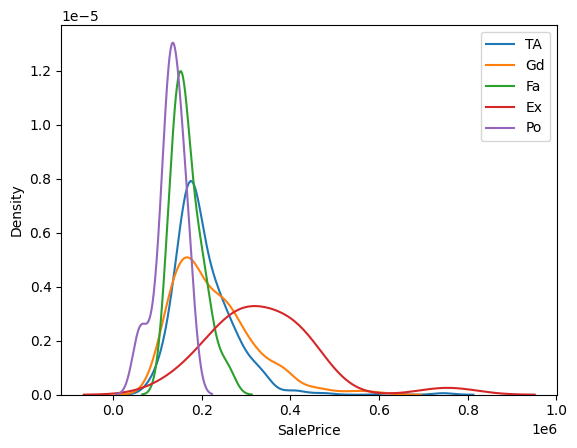

In [51]:
## Before Imputation
for category in data["FireplaceQu"].dropna().unique():
  sns.kdeplot(data[data["FireplaceQu"] == category]["SalePrice"] , label = category)
plt.legend()
plt.show()

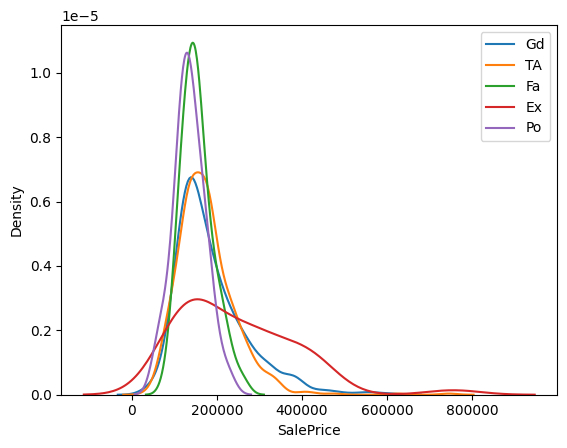

In [52]:
# After Imputation
for category in data["FireplaceQu_imputed"].dropna().unique():
  sns.kdeplot(data[data["FireplaceQu_imputed"] == category]["SalePrice"] , label = category)
plt.legend()
plt.show()

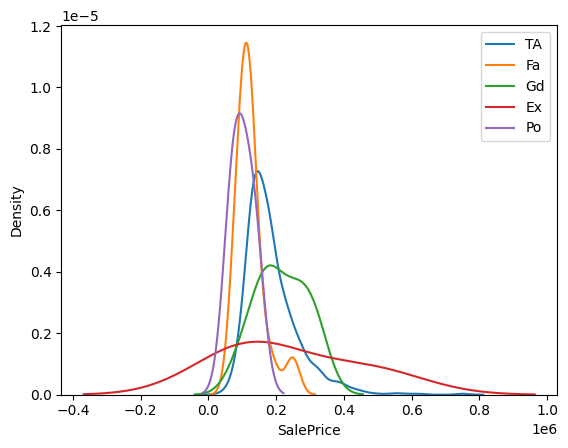

In [53]:
## GarageQual BEfore imputation
for category in data["GarageQual"].dropna().unique():
  sns.kdeplot(data[data["GarageQual"] == category]["SalePrice"] , label = category)
plt.legend()
plt.show()

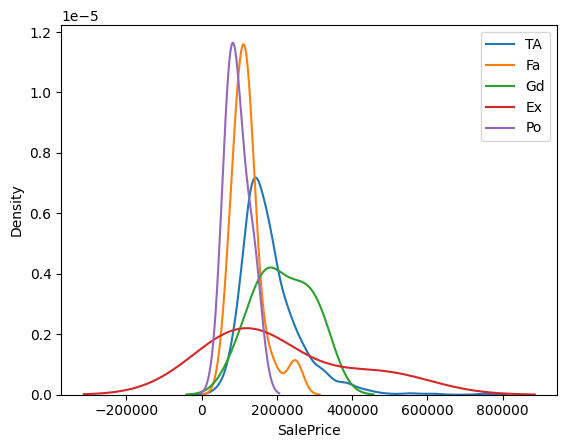

In [54]:
## Garagequal after imputation
for category in data["GarageQual_imputed"].dropna().unique():
  sns.kdeplot(data[data["GarageQual_imputed"] == category]["SalePrice"] , label = category)
plt.legend()
plt.show()